# 10.5 AVERAGE OVER MANY DRAWS

Use this notebook to store your work for this problem.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss
from numpy import random
from scipy.stats import norm
from scipy.special import beta
from numpy.random import default_rng

rand = default_rng().random

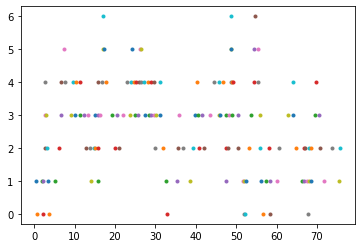

In [16]:
l0 = 0 
beta_birth = 1 
k_death = 0.4

N = 150

l = l0
T = 0
l_r = np.zeros(N)
t_r = np.zeros(N)
for n in range(N):
    rate = beta_birth+ k_death*l
    t = - 1/rate * np.log(rand())
    xi = beta_birth/rate
    event = rand() < xi
    if event: 
        l = l+1
    else: 
        l = l-1
    T = T+t
    l_r[n] = l
    t_r[n] = T
    plt.plot(T,l,'.')

In [18]:
def gillespie(l_init,T):
    t_s = np.zeros(T)
    l_s = np.zeros(T)
    beta_birth = 1
    k_death = 0.4
    N = T
    T0 = 0 
    l = l_init
    
    for n in range(N):
        rate = beta_birth + k_death*l
        t = - 1/rate * np.log(rand())
        xi = beta_birth/rate
        event = rand() < xi
        if event: 
            l = l+1
        else: 
            l = l-1
        T0 = T0+t
        t_s[n] = T0
        l_s[n] = l 
    
    return t_s, l_s

In [21]:
num_sim = 150
T = 300
l0 = 0 
l = np.empty((150,300))
t = np.empty((150,300))
for i in range(num_sim):
    res = gillespie(l0,T)
    l[i] = res[1]
    t[i] = res[0]

In [29]:
sum_l = np.ones(T)
sum_t = np.ones(T)
for n in range(T):
    sum_l[n] = l[0:,n].sum() 
        
average_l = sum_l/num_sim

Text(0.5, 1.0, 'Average T vs L')

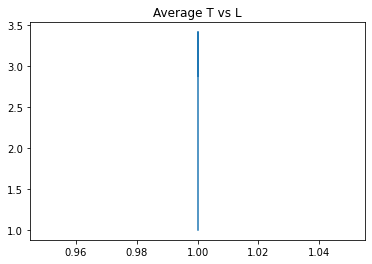

In [33]:
plt.plot(sum_t,average_l)
plt.title("Average T vs L")

##### ***REPLACE WITH YOUR COMMENTS.***